# Exercise 6.2 in JT: More on pooling in credit markets.

Import packages, classes and settings:

In [1]:
import numpy as np
import math
import itertools
from scipy import optimize
import scipy.stats as stats
import PS1 as func
# For plots:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('seaborn-whitegrid')
mpl.style.use('seaborn')
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Compared to exercise and 6.1, alter the setup as follows:

* Continuum of types instead of good/bad. For entrepreneur $i$ the value $B_i$ is distributed according to the CDF function $H(B)$, with support on $[0, \bar{B}]$
* Monopoly lender offers credit to borrowers (entrepreneurs).

The lender offers $R_b$ for a successfull investment, otherwise 0. Borrower $i$ then behaves **if** the IC constraint holds: $B_i\leq \Delta p R_b$. The expected profits from offering the contract is then defined by:


$$\begin{align} 
    \pi(R_b) = H\big(\Delta p R_b\big)p_H(R-R_b)+\left[1-H\big(\Delta p R_b\big)\right] p_L(R-R_b)-I, \tag{Profits}
\end{align} $$

where $H(\Delta p R_b)$ measures the share of borrowers that behave, i.e. with $B_i<\Delta R_b$. From this note:

* The share of high-quality borrowers increase with $R_b$ (bad types start to behave).
* Same dynamics as before: Adverse selection reduces quality of lending, induces cross-subsidies between types.

In the following we will use the uniform distribution in illustrations.

### Uniform distribution:

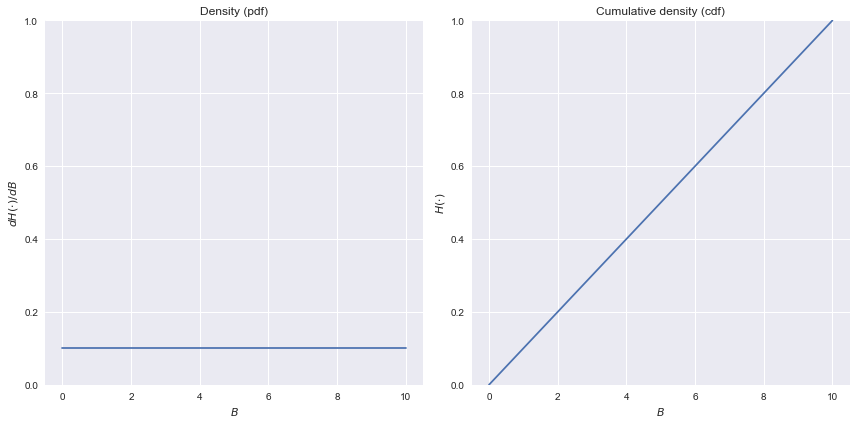

In [2]:
Model = func.poolingCredit() # create model instance with default values
Model.plot_distr()

### Expected profits as a function of $B$:

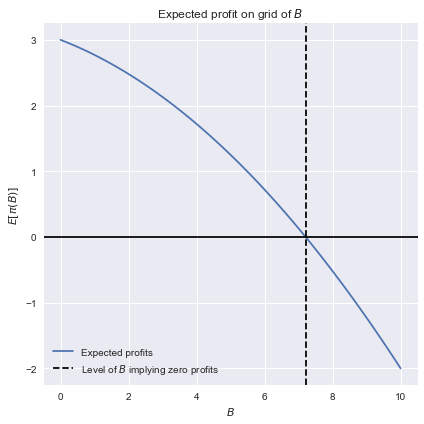

In [3]:
Model.plot_exp_profits()

## Q: Show a number of results:
1. Proportion of high-quality borrowers is endogenous and depends on $R_b$.
2. Adverse selection reduces quality of lending
3. externality among types: Presence of low-quality borrower forces lender to charge interest rate, generating strictly positive profits on high-quality types.
4. Show an example of 'bad lemons' breaking down the market.

The first 3 are answered straightforwardly:

* A high quality borrower, is one that behaves. The share of high quality borrowers is defined as $H(\Delta p R_b)$. If $R_b$ increases, so does this share.
* Adverse selection means that the lender cannot e.g. **only** offer the contract $R_b$ to certain types / offer individual contracts based on their types $R_b^i(B_i)$. 

Lastly, we give an example where the market breaks down. All we need for the market to break down, is to find a scenario where profits of the lender is negative:

* Assume that $p_L=0$, and that borrowers are **uniformly distributed** that is $H(B) = B/\bar{B}$, for $B\in[0,\bar{B}]$.
* In this case the expected profits are given by:

$$\begin{align}
    \pi(R_b) &= \overbrace{\dfrac{\Delta p R_b}{\bar{B}}}^{\equiv H(\Delta p R_b)} p_H (R-R_b)-I  \\ 
             &= \dfrac{p_H R_b}{\bar{B}}p_H(R-R_b)-I.
\end{align} $$

The profit maximizing level of $R_b$ is then given by: $R_b^* = R/2$, which yields profits of

$$\begin{align} 
    \pi(R_b^*) &= \dfrac{p_H R/2}{\bar{B}}p_H\left(R-\dfrac{R}{2}\right)-I \\
               &= \dfrac{p_H^2R^2}{4\bar{B}}-I.
\end{align} $$ 

Thus as long as $I>p_H^2R^2/(4\bar{B})$ the market breaks down.

We can show this by updating parameter values as follows:

In [4]:
par = {'pL': 0, # set pL = 0, which is set to 0.5 as default
       'I': 5} #set I=5, which is set to 2 as default
Model.upd_par(par)

Next, we can plot the expected profit function:

Note that compared to before (where $p_L=0.5$), profits can no longer be zero.

We can plot them next to each other by initializing the model again with standard (or other) settings:

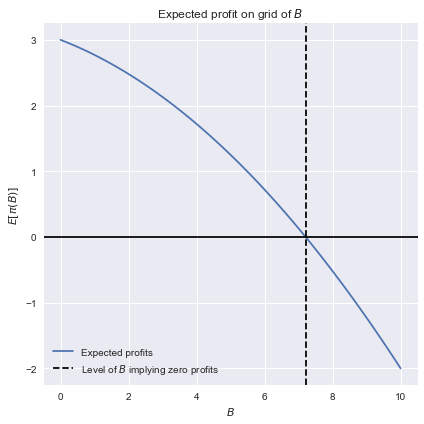

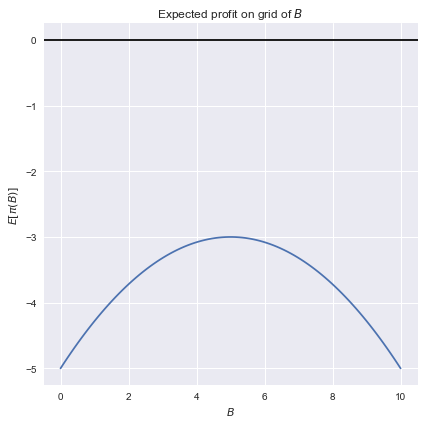

In [7]:
Model_st = func.poolingCredit()
Model_st.plot_exp_profits()
Model.plot_exp_profits()